In [3]:
import chess
import chess.pgn
import matplotlib.pyplot as plt
import pandas as pd


In [4]:

def parse_pgn(file_path):
    games = []

    with open(file_path) as f:
        while True:
            game = chess.pgn.read_game(f)
            if game is None:
                break

            game_info = {
                "Event": game.headers.get("Event", ""),
                "Site": game.headers.get("Site", ""),
                "Date": game.headers.get("Date", ""),
                "White": game.headers.get("White", ""),
                "Black": game.headers.get("Black", ""),
                "WhiteElo": game.headers.get("WhiteElo", ""),
                "BlackElo": game.headers.get("BlackElo", ""),
                "Opening": game.headers.get("ECO", ""),
                "Result": game.headers.get("Result", ""),
                "Termination":game.headers.get("Termination",""),
                "Moves": [str(move) for move in game.mainline_moves()],
            }

            games.append(game_info)

    return pd.DataFrame(games)


df_black_Rapid = parse_pgn(r'omarsayeh-black-Rapid.pgn')
df_white_Rapid = parse_pgn(r'omarsayeh-White-Rapid.pgn')
df_Black_Blitz = parse_pgn(r'omarsayeh-black-Blitz.pgn')
df_white_Blitz = parse_pgn(r'omarsayeh-white-Blitz.pgn')

In [6]:
df_black_Rapid.head(5)

,Event,Site,Date,White,Black,WhiteElo,BlackElo,Opening,Result,Termination,Moves
0,Live Chess,Chess.com,2023.12.03,ocarlosdepaula,omarsayeh,1091,1026,A00,1-0,ocarlosdepaula won by checkmate,"[e2e3, c7c6, d2d4, d7d5, b2b3, g8f6, c1b2, c8f..."
1,Live Chess,Chess.com,2023.12.06,rekip,omarsayeh,1020,1016,B12,1-0,rekip won by checkmate,"[e2e4, c7c6, d2d4, d7d5, e4e5, c8f5, c2c3, e7e..."
2,Live Chess,Chess.com,2023.12.06,Phyrgial,omarsayeh,1019,1006,B10,1-0,Phyrgial won by checkmate,"[e2e4, c7c6, b1c3, d7d5, e4d5, c6d5, d2d4, c8f..."
3,Live Chess,Chess.com,2023.12.15,sahil0611,omarsayeh,1051,992,A00,1-0,sahil0611 won - game abandoned,"[a2a4, g8f6, f2f3, g7g6, g2g4, f8g7, c2c3, d7d..."
4,Live Chess,Chess.com,2023.12.30,00-hosny-00,omarsayeh,972,1002,B10,0-1,omarsayeh won by resignation,"[e2e4, c7c6, g1f3, d7d5, f1d3, g7g6, e1g1, f7f..."


In [11]:
df_Black_Blitz

,Event,Site,Date,White,Black,WhiteElo,BlackElo,Opening,Result,Termination,Moves
0,Live Chess,Chess.com,2024.01.01,RaseKv,omarsayeh,787,762,B10,0-1,omarsayeh won by checkmate,"[e2e4, c7c6, g1f3, d7d5, e4d5, c6d5, b1c3, g8f..."
1,Live Chess,Chess.com,2024.01.01,DantesInferno19,omarsayeh,785,752,B10,1-0,DantesInferno19 won by checkmate,"[e2e4, c7c6, g1f3, d7d5, e4e5, c8f5, f3d4, f5g..."
2,Live Chess,Chess.com,2024.01.05,nflaifel,omarsayeh,730,758,B10,0-1,omarsayeh won by checkmate,"[e2e4, c7c6, e4e5, d7d5, d2d4, c8f5, c1g5, h7h..."
3,Live Chess,Chess.com,2024.01.05,MileKlimoski,omarsayeh,695,757,B10,0-1,omarsayeh won by checkmate,"[e2e4, c7c6, e4e5, d7d5, d2d4, c8f5, g2g4, f5g..."
4,Live Chess,Chess.com,2023.12.04,jose8ak,omarsayeh,714,717,B12,1-0,jose8ak won by resignation,"[e2e4, c7c6, d2d4, d7d5, e4e5, c8f5, c2c4, e7e..."
...,...,...,...,...,...,...,...,...,...,...,...
115,Live Chess,Chess.com,2023.04.21,morpheus-hls98,omarsayeh,719,708,B10,1-0,morpheus-hls98 won by resignation,"[e2e4, c7c6, g1f3, d7d5, d2d3, c8g4, f1e2, e7e..."
116,Live Chess,Chess.com,2023.04.21,MacarioSea,omarsayeh,669,708,B12,0-1,omarsayeh won by resignation,"[e2e4, c7c6, g1f3, d7d5, d2d4, d5e4, f3e5, c6c..."
117,Live Chess,Chess.com,2023.04.22,benreade7,omarsayeh,741,710,B10,0-1,omarsayeh won by checkmate,"[e2e4, c7c6, b1c3, d7d5, f2f4, c6c5, c3d5, b8c..."
118,Live Chess,Chess.com,2023.04.28,Berlin-Bear,omarsayeh,748,688,B13,1-0,Berlin-Bear won on time,"[e2e4, c7c6, d2d4, d7d5, e4d5, c6d5, c2c3, b8c..."


In [15]:
df_black_Rapid['Date'] = pd.to_datetime(df_black_Rapid['Date'], errors='coerce').dt.strftime('%Y-%m-%d')
df_white_Rapid['Date'] = pd.to_datetime(df_white_Rapid['Date'], errors='coerce').dt.strftime('%Y-%m-%d')
df_Black_Blitz['Date'] = pd.to_datetime(df_black_Rapid['Date'], errors='coerce').dt.strftime('%Y-%m-%d')
df_white_Blitz['Date'] = pd.to_datetime(df_white_Rapid['Date'], errors='coerce').dt.strftime('%Y-%m-%d')

In [17]:
Rapid_df = pd.concat([df_black_Rapid, df_white_Rapid]).sort_values(by='Date').reset_index(drop=True)

In [20]:
Blitz_df = pd.concat([df_white_Blitz, df_Black_Blitz]).sort_values(by='Date').reset_index(drop=True)

In [69]:
Rapid_df=Rapid_df.rename(columns={'Opening':'Opening Code'})
Blitz_df=Blitz_df.rename(columns={'Opening':'Opening Code'})



In [70]:
Rapid_df

,Event,Site,Date,White,Black,WhiteElo,BlackElo,Opening Code,Result,Termination,Moves,Outcome
0,Live Chess,Chess.com,2022-03-09,bensalahdhouha,omarsayeh,327,233,A40,1-0,bensalahdhouha won by checkmate,"[d2d4, e7e6, c1f4, f8e7, e2e4, f7f6, f1b5, c7c...",Lost as Black
1,Live Chess,Chess.com,2022-03-09,omarsayeh,bensalahdhouha,456,160,A00,1-0,omarsayeh won on time,"[d2d3, e7e5, b1c3, d8e7, c1d2, e7h4, d2e3, g8h...",Won as White
2,Live Chess,Chess.com,2022-03-10,HAKAIARASH,omarsayeh,100,207,B07,0-1,omarsayeh won by checkmate,"[e2e4, d7d6, d2d3, e7e5, f2f3, g8f6, g2g4, h7h...",Won as Black
3,Live Chess,Chess.com,2022-03-10,omarsayeh,daneer_aisha,187,155,A06,1-0,omarsayeh won by checkmate,"[g1f3, d7d5, b1c3, e7e6, d2d4, g8f6, c1g5, f8e...",Won as White
4,Live Chess,Chess.com,2022-03-10,omarsayeh,M4rkyM4ark,152,219,A02,1-0,omarsayeh won - game abandoned,"[f2f4, e7e5, f4e5, f8c5, g1f3, d7d6, f3g5, d8g...",Won as White
...,...,...,...,...,...,...,...,...,...,...,...,...
842,Live Chess,Chess.com,2023-12-30,Villeneuve1969,omarsayeh,1011,1013,B15,0-1,omarsayeh won by resignation,"[e2e4, c7c6, d2d4, d7d5, b1c3, g7g6, g1f3, f8g...",Won as Black
843,Live Chess,Chess.com,2023-12-30,00-hosny-00,omarsayeh,972,1002,B10,0-1,omarsayeh won by resignation,"[e2e4, c7c6, g1f3, d7d5, f1d3, g7g6, e1g1, f7f...",Won as Black
844,Live Chess,Chess.com,2023-12-31,omarsayeh,Muruvamal,1013,996,D20,1/2-1/2,Game drawn by insufficient material,"[d2d4, d7d5, c2c4, d5c4, e2e4, e7e5, g1f3, f7f...",Draw as White
845,Live Chess,Chess.com,2023-12-31,KZL2001,omarsayeh,990,1012,D02,1-0,KZL2001 won by checkmate,"[g1f3, d7d5, d2d4, c7c6, e2e3, c8f5, c2c4, e7e...",Lost as Black


In [21]:
Rapid_df['Outcome'] = Rapid_df.apply(lambda row: 'Won as White' if row['White'] == 'omarsayeh' and row['Result'] == '1-0' 
                                        else 'Lost as White' if row['White'] == 'omarsayeh' and row['Result'] == '0-1'
                                        else 'Lost as Black' if row ['Black']=='omarsayeh'and row['Result'] == '1-0'
                                        else 'Won as Black' if row['Black'] == 'omarsayeh' and row['Result'] == '0-1'
                                        else 'Draw as Black' if row['Black'] == 'omarsayeh' and row['Result'] == '1/2-1/2'
                                        else 'Draw as White'
                                        , axis=1)

In [22]:
Blitz_df['Outcome'] = Blitz_df.apply(lambda row: 'Won as White' if row['White'] == 'omarsayeh' and row['Result'] == '1-0' 
                                        else 'Lost as White' if row['White'] == 'omarsayeh' and row['Result'] == '0-1'
                                        else 'Lost as Black' if row ['Black']=='omarsayeh'and row['Result'] == '1-0'
                                        else 'Won as Black' if row['Black'] == 'omarsayeh' and row['Result'] == '0-1'
                                        else 'Draw as Black' if row['Black'] == 'omarsayeh' and row['Result'] == '1/2-1/2'
                                        else 'Draw as White'
                                        , axis=1)

In [23]:
Blitz_df.sample(10)

,Event,Site,Date,White,Black,WhiteElo,BlackElo,Opening,Result,Termination,Moves,Outcome
211,Live Chess,Chess.com,2023-07-20,omarsayeh,danimalc,757,764,D06,1-0,omarsayeh won - game abandoned,"[d2d4, d7d5, c2c4, g8f6, b1c3, c7c6, g1f3, h7h...",Won as White
122,Live Chess,Chess.com,2023-03-16,omarsayeh,BobbyBlackClock,726,747,A40,1-0,omarsayeh won by checkmate,"[d2d4, e7e5, c2c4, d7d6, d4e5, d6e5, d1d8, e8d...",Won as White
84,Live Chess,Chess.com,2023-03-07,jelkoubi,omarsayeh,748,748,B10,1-0,jelkoubi won by checkmate,"[e2e4, c7c6, f1c4, d7d5, e4d5, c6d5, c4b5, b8c...",Lost as Black
230,Live Chess,Chess.com,2023-11-25,17gann,omarsayeh,780,747,A45,1-0,17gann won by checkmate,"[b1c3, g8f6, d2d4, g7g6, e2e4, f8g7, e4e5, f6h...",Lost as Black
23,Live Chess,Chess.com,2023-02-07,Jope8647,omarsayeh,480,541,A40,0-1,omarsayeh won by resignation,"[d2d4, g7g6, e2e3, g8f6]",Won as Black
228,Live Chess,Chess.com,2023-11-06,omarsayeh,mgaonam,750,704,D30,0-1,mgaonam won - game abandoned,"[d2d4, d7d5, c2c4, e7e6, g1f3, b8c6, b1c3, d5c...",Lost as White
217,Live Chess,Chess.com,2023-07-27,donnyds,omarsayeh,687,733,B12,0-1,omarsayeh won by resignation,"[d2d4, c7c6, e2e4, d7d5, e4e5, c8f5, g1e2, e7e...",Won as Black
154,Live Chess,Chess.com,2023-03-31,white_lotus516,omarsayeh,392,461,B10,0-1,omarsayeh won by resignation,"[e2e4, c7c6, d1h5, d7d5, e4d5, c6d5, c2c4, g8f...",Won as Black
199,Live Chess,Chess.com,2023-07-07,Abdelraheemameen,omarsayeh,758,757,B10,1-0,Abdelraheemameen won by checkmate,"[e2e4, c7c6, b1c3, d7d5, g1f3, d5e4, c3e4, c8f...",Lost as Black
100,Live Chess,Chess.com,2023-03-12,damienmoccia,omarsayeh,656,677,B13,1/2-1/2,Game drawn by agreement,"[e2e4, c7c6, d2d4, d7d5, e4d5, c6d5, b1c3, b8c...",Draw as Black


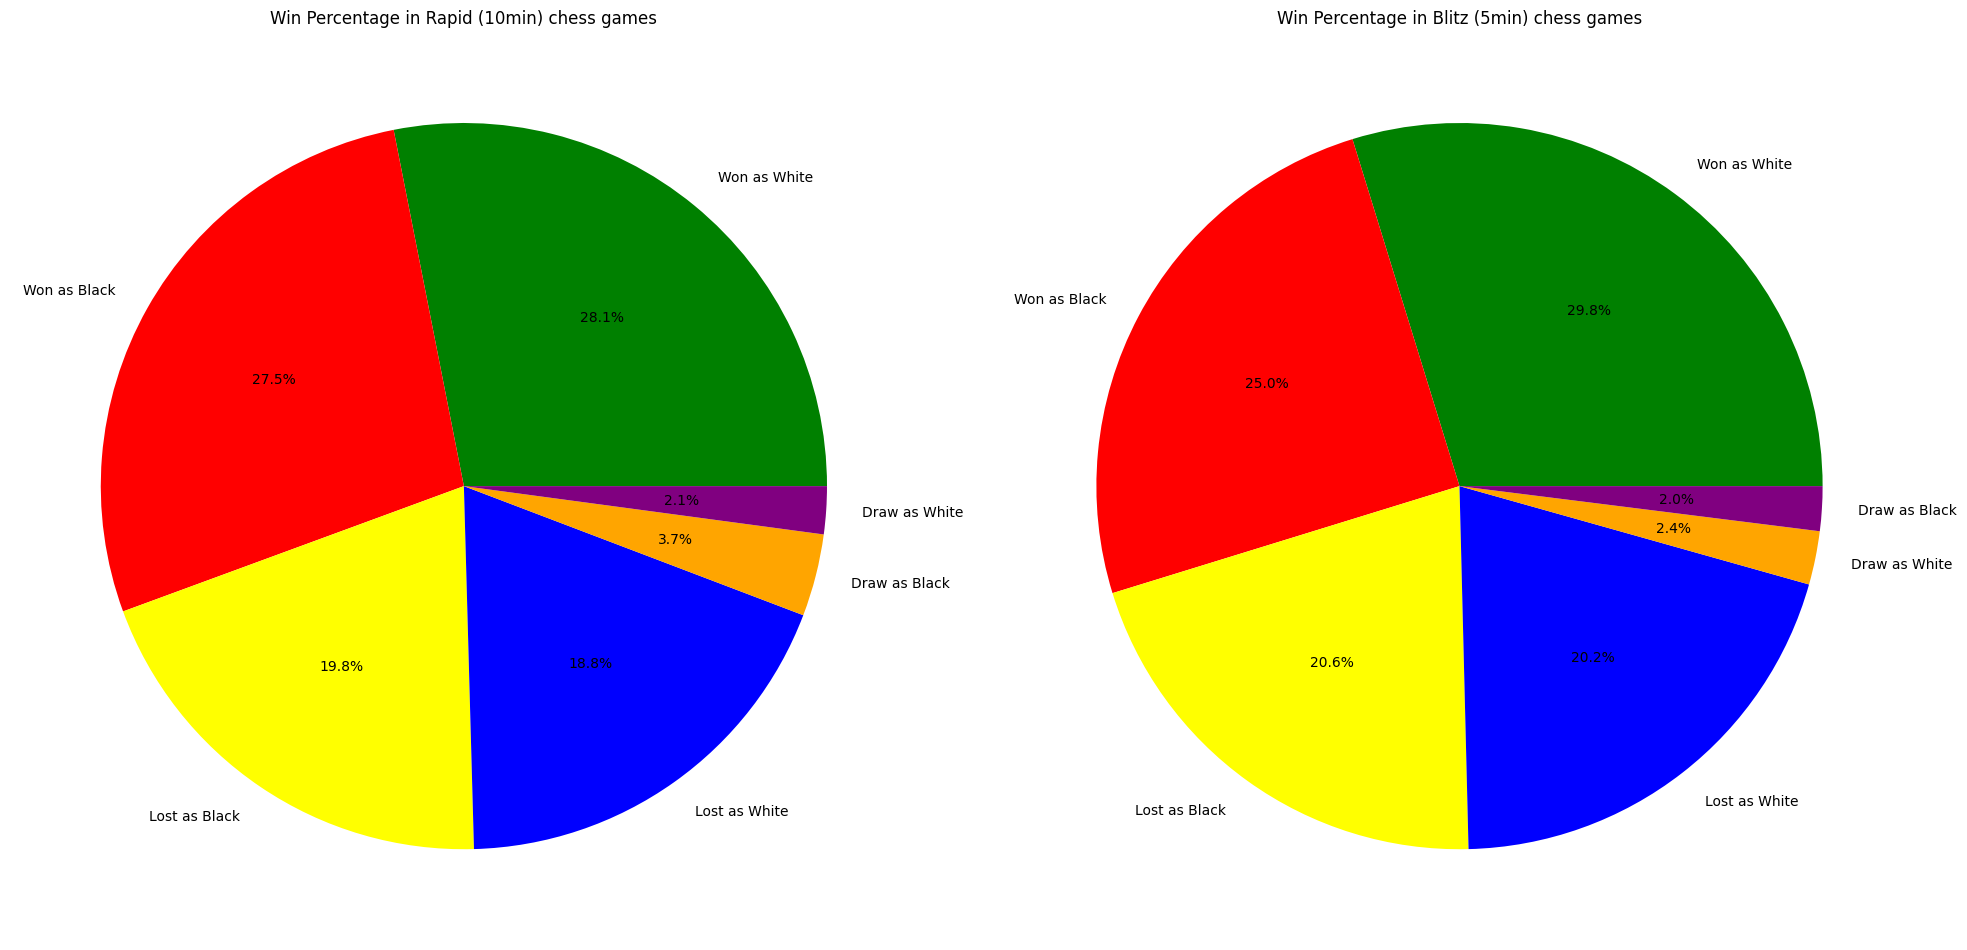

In [42]:
# Calculate win percentage
win_percentageRapid = Rapid_df['Outcome'].value_counts(normalize=True) * 100
win_percentageBlitz = Blitz_df['Outcome'].value_counts(normalize=True) * 100

plt.figure(figsize=(20,20))
# Plotting as a Rapid pie chart
plt.subplot(1, 2, 1)
plt.pie(win_percentageRapid, labels=win_percentageRapid.index, autopct='%1.1f%%',colors=['green', 'red', 'yellow','blue','orange','purple'])
plt.title('Win Percentage in Rapid (10min) chess games')



# Plotting as a Blitz pie chart
plt.subplot(1, 2, 2)
plt.pie(win_percentageBlitz, labels=win_percentageBlitz.index, autopct='%1.1f%%',colors=['green', 'red', 'yellow','blue','orange','purple'])
plt.title('Win Percentage in Blitz (5min) chess games')

# Adjust layout for better spacing
plt.tight_layout()

# Display the pie charts
plt.show()

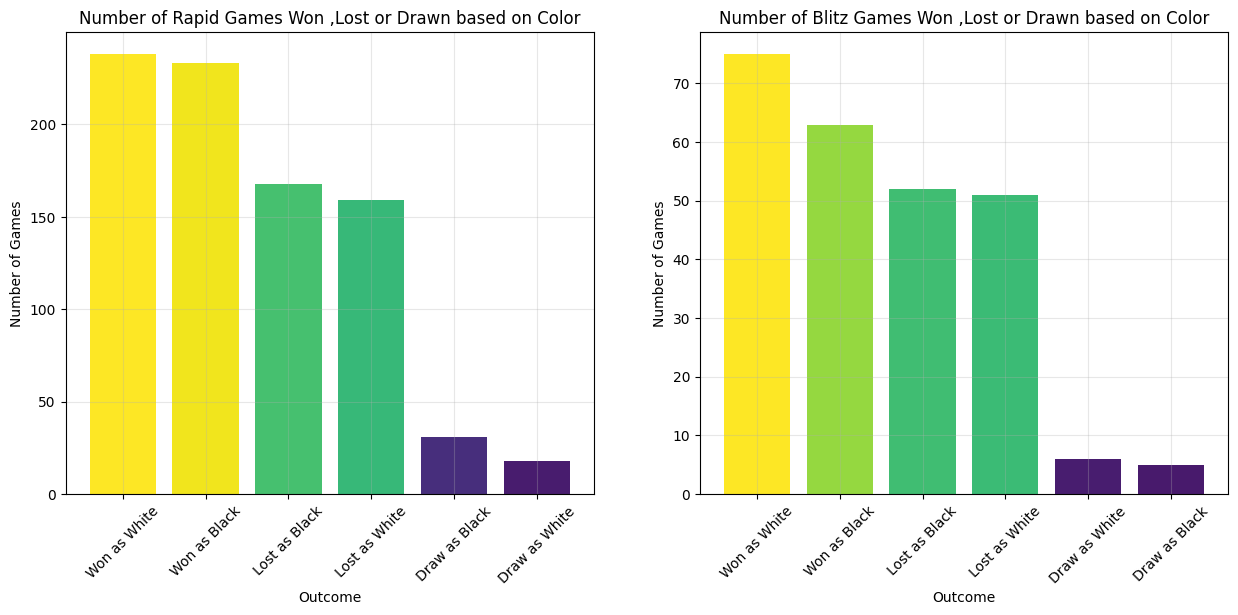

In [48]:
# Count the number of games won and lost
outcome_counts_Rapid = Rapid_df['Outcome'].value_counts()
outcome_counts_Blitz = Blitz_df['Outcome'].value_counts()


# Plotting as a bar chart (Rapid)
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
plt.bar(outcome_counts_Rapid.index, outcome_counts_Rapid.values, color=plt.cm.viridis(outcome_counts_Rapid / outcome_counts_Rapid.max()))
plt.title('Number of Rapid Games Won ,Lost or Drawn based on Color')
plt.xlabel('Outcome')
plt.ylabel('Number of Games')
plt.xticks(rotation=45)
plt.grid(True,alpha=0.3)

# Plotting as a bar chart (Blitz)
plt.subplot(1, 2, 2)
plt.bar(outcome_counts_Blitz.index, outcome_counts_Blitz.values, color=plt.cm.viridis(outcome_counts_Blitz / outcome_counts_Blitz.max()))
plt.title('Number of Blitz Games Won ,Lost or Drawn based on Color')
plt.xlabel('Outcome')
plt.ylabel('Number of Games')
plt.grid(True,alpha=0.3)
plt.xticks(rotation=45)

plt.show()

In [52]:
Rapid_df.head(5)

,Event,Site,Date,White,Black,WhiteElo,BlackElo,Opening,Result,Termination,Moves,Outcome
0,Live Chess,Chess.com,2022-03-09,bensalahdhouha,omarsayeh,327,233,A40,1-0,bensalahdhouha won by checkmate,"[d2d4, e7e6, c1f4, f8e7, e2e4, f7f6, f1b5, c7c...",Lost as Black
1,Live Chess,Chess.com,2022-03-09,omarsayeh,bensalahdhouha,456,160,A00,1-0,omarsayeh won on time,"[d2d3, e7e5, b1c3, d8e7, c1d2, e7h4, d2e3, g8h...",Won as White
2,Live Chess,Chess.com,2022-03-10,HAKAIARASH,omarsayeh,100,207,B07,0-1,omarsayeh won by checkmate,"[e2e4, d7d6, d2d3, e7e5, f2f3, g8f6, g2g4, h7h...",Won as Black
3,Live Chess,Chess.com,2022-03-10,omarsayeh,daneer_aisha,187,155,A06,1-0,omarsayeh won by checkmate,"[g1f3, d7d5, b1c3, e7e6, d2d4, g8f6, c1g5, f8e...",Won as White
4,Live Chess,Chess.com,2022-03-10,omarsayeh,M4rkyM4ark,152,219,A02,1-0,omarsayeh won - game abandoned,"[f2f4, e7e5, f4e5, f8c5, g1f3, d7d6, f3g5, d8g...",Won as White


In [55]:
Rapid_df['Date'] = pd.to_datetime(Rapid_df['Date'])
Blitz_df['Date'] = pd.to_datetime(Blitz_df['Date'])


In [60]:
# Convert Elo columns to numeric
Rapid_df['WhiteElo'] = pd.to_numeric(Rapid_df['WhiteElo'], errors='coerce')
Rapid_df['BlackElo'] = pd.to_numeric(Rapid_df['BlackElo'], errors='coerce')
Blitz_df['WhiteElo'] = pd.to_numeric(Blitz_df['WhiteElo'], errors='coerce')
Blitz_df['BlackElo'] = pd.to_numeric(Blitz_df['BlackElo'], errors='coerce')


In [63]:
# Filter based on player name and calculate the average Elo rating
if (Rapid_df['White'] == 'omarsayeh').any():
    monthly_elo_Rapid = Rapid_df[Rapid_df['White'] == 'omarsayeh'].groupby(Rapid_df['Date'].dt.to_period("M"))['WhiteElo'].mean()
elif (Rapid_df['Black'] == 'omarsayeh').any():
    monthly_elo_Rapid = Rapid_df[Rapid_df['Black'] == 'omarsayeh'].groupby(Rapid_df['Date'].dt.to_period("M"))['BlackElo'].mean()



In [61]:
# Filter based on player name and calculate the average Elo rating
if (Blitz_df['White'] == 'omarsayeh').any():
    monthly_elo_blitz = Blitz_df[Blitz_df['White'] == 'omarsayeh'].groupby(Blitz_df['Date'].dt.to_period("M"))['WhiteElo'].mean()
elif (Blitz_df['Black'] == 'omarsayeh').any():
    monthly_elo_blitz = Blitz_df[Blitz_df['Black'] == 'omarsayeh'].groupby(Blitz_df['Date'].dt.to_period("M"))['BlackElo'].mean()


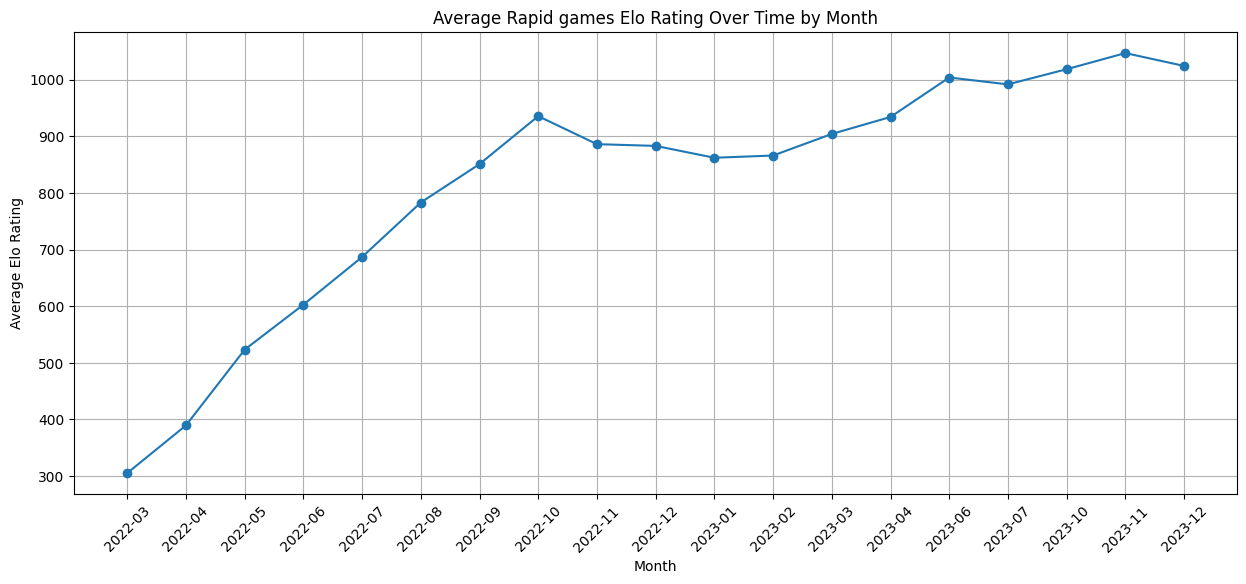

In [64]:

# Plotting as a line chart
plt.figure(figsize=(15, 6))
plt.plot(monthly_elo_Rapid.index.astype(str), monthly_elo_Rapid.values, marker='o')  # Convert the PeriodIndex to strings
plt.title('Average Rapid games Elo Rating Over Time by Month')
plt.xlabel('Month')
plt.ylabel('Average Elo Rating')
plt.grid(True)
plt.xticks(rotation=45)

plt.show()

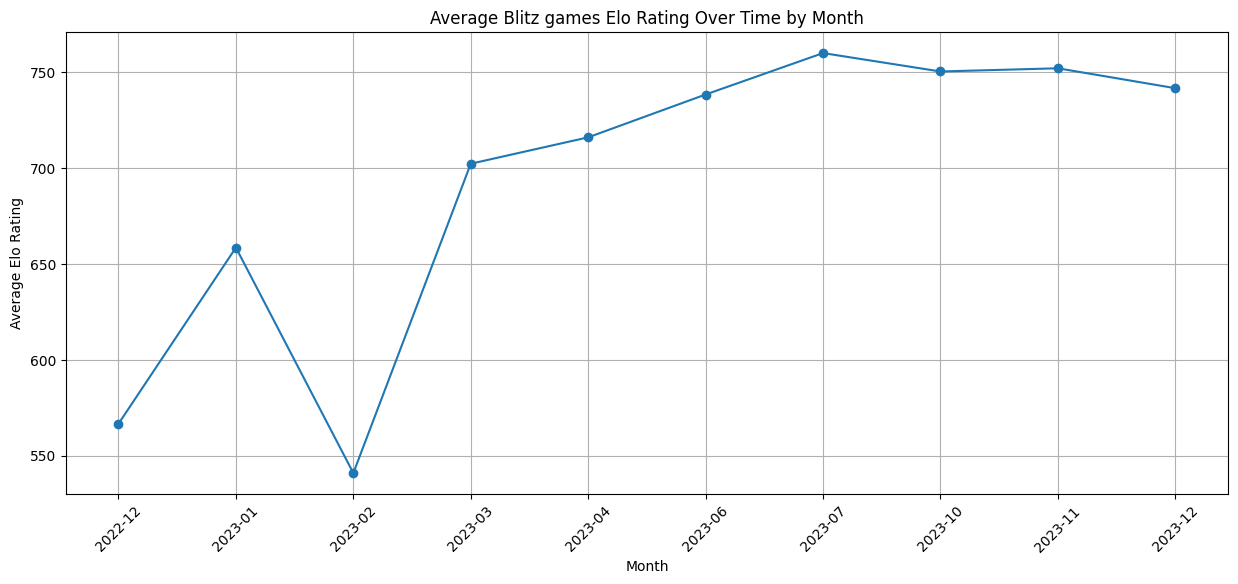

In [66]:
# Plotting as a line chart
plt.figure(figsize=(15, 6))
plt.plot(monthly_elo_blitz.index.astype(str), monthly_elo_blitz.values, marker='o')  # Convert the PeriodIndex to strings
plt.title('Average Blitz games Elo Rating Over Time by Month')
plt.xlabel('Month')
plt.ylabel('Average Elo Rating')
plt.grid(True)
plt.xticks(rotation=45)

plt.show()

In [94]:
%run ECO_parser.py
Rapid_df['Opening'] = Rapid_df['Opening Code'].apply(lambda code: scrape_eco(f"https://www.365chess.com/eco/{code}"))
Blitz_df['Opening'] = Blitz_df['Opening Code'].apply(lambda code: scrape_eco(f"https://www.365chess.com/eco/{code}"))


In [95]:
%run ECO_parser.py

Rapid_df['Opening'] =Rapid_df['Opening'].apply(extractOpening)

In [98]:
Rapid_df.to_csv('Rapid_Games.csv',index=False)
Blitz_df.to_csv('Blitz_Games.csv',index=False)